## 2022년 01월 14일 스터디
**Kaggle - TMDB 5000 Movie Dataset, The Movies Dataset - Getting Started with a Movie Recommendation System**

2022/01/14 목주영

- 커널 링크 : https://www.kaggle.com/ibtesama/getting-started-with-a-movie-recommendation-system
    - https://www.kaggle.com/tmdb/tmdb-movie-metadata 
    - https://www.kaggle.com/rounakbanik/the-movies-dataset 링크로 들어가 영화 데이터 다운받기
- 학습 방법 : 전체 흐름 파악 + 3번 필사 + 공부한 내용 정리하여 개인 보관
- 리뷰 사항 : 코드 전반적인 발표 준비 + 인사이트와 아쉬운 사항 제기 및 보완<br>
- <span style="color:green"><b>역할 분담 : 24-30 주영</b></span>

**머신러닝 스터디**
- 목표 : 머신러닝 관련 실습을 통해, 국내 공모전 참여 및 수상
- 스터디 방법 : 캐글, 데이콘 튜토리얼 코드 리뷰 ~ 공모전 참여
- 소요 시간 : 1시간 30분~2시간(줌 온라인)

<span style="color:blue">**인사이트, 아쉬운 사항 제기 및 보완**</span>

<ol>
    <li>demographic filtering, content-based filtering, collaborative filtering 각각의 차이점과 장단점, 문제점을 알게되었다.</li>
    <li><span style="color:red">몰랐던, 추가 설명 필요한 클래스/메서드에 대한 설명 쓰기</span></li>
    <li> 한국어로 번역, 오타 정정, 더 이상 지원하지 않는 메서드 수정</li>
    <li>movie dataset은 사용하는 데이터가 거의 모두 문자열이다. 문자를 숫자로 바꾸는 방법들을 알게되었다. (BOW 방법론: TF-IDF, CountVectorizer)</li>
    <li>다른 모델들로도 학습해보기</li>
    <li>K폴드 교차검증기법(K-fold Cross Validation) 사용하기</li>
    <li>성능 측정 지표 사용하기 -> RMSE (Root Mean Square Error, l2 norm), MAE (Mean Absolute Error, l1 norm), MSE, cost function</li>
    <li>모델을 적절하게 선택했는지 확인하는 방법들 -> Grid Search, Randomized Search, Ensemble Method 추후 사용할 예정</li>
</ol>

# **The Age of Recommender Systems**

The rapid growth of data collection has led to a new era of information. Data is being used to create more efficient systems and this is where Recommendation Systems come into play.  Recommendation Systems are a type of **information filtering systems** as they improve the quality of search results and provides items that are more relevant to the search item or are realted to the search history of the user.  


They are used to predict the **rating** or **preference** that a user would give to an item. Almost every major tech company has applied them in some form or the other: Amazon uses it to suggest products to customers, YouTube uses it to decide which video to play next on autoplay, and Facebook uses it to recommend pages to like and people to follow. 
Moreover, companies like Netflix and Spotify depend highly on the effectiveness of their recommendation engines for their business and success.

# **추천 시스템의 시대**

데이터 수집의 급속한 성장은 새로운 정보 시대를 열었습니다. 데이터는 보다 효율적인 시스템을 만드는 데 사용되고 있으며, 여기서 추천 시스템이 작동됩니다.  추천 시스템은 **정보 필터링 시스템**의 일종으로, 검색 결과의 품질을 향상시키고 검색 항목과 더 관련이 있거나 사용자의 검색 기록과 일치하는 항목을 제공합니다. 

사용자가 항목에 부여할 **등급**이나 **선호도**를 예측하는 데 사용됩니다. 거의 모든 주요 기술 회사들이 어떤 형태로든 추천 시스템을 적용했습니다: 아마존은 고객들에게 제품을 제안하기 위해, 유튜브는 다음에 어떤 비디오를 자동 재생할지 결정하기 위해, 페이스북은 좋아하는 페이지와 팔로우할 사람들을 추천하기 위해 그것을 사용합니다. 더욱이, 넷플릭스나 스포티파이와 같은 회사들은 그들의 사업과 사업에 대한 추천 엔진의 효과에 크게 의존합니다. 더욱이, 넷플릭스나 스포티파이 같은 회사들은 그들의 사업과 성공을 위한 추천 엔진의 효과에 크게 의존합니다.

![](https://i.kinja-img.com/gawker-media/image/upload/s--e3_2HgIC--/c_scale,f_auto,fl_progressive,q_80,w_800/1259003599478673704.jpg)

In this kernel we'll be building a baseline Movie Recommendation System using [TMDB 5000 Movie Dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata). For novices like me this kernel will pretty much serve as a foundation in recommendation systems and will provide you with something to start with.

이 커널에서는  [TMDB 5000 Movie Dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata)을 사용하여 기본 동영상 추천 시스템을 구축합니다. 나 같은 초보자들에게 이 커널은 추천 시스템의 기초가 될 것이고, 당신에게 뭔가 시작할 수 있는 것을 제공할 것입니다.

**So let's go!**

There are basically three types of recommender systems:-

추천 시스템에는 기본적으로 세 가지 유형이 있습니다.

> *  **Demographic Filtering**- They offer generalized recommendations to every user, based on movie popularity and/or genre. The System recommends the same movies to users with similar demographic features. Since each user is different , this approach is considered to be too simple. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience.


인구 통계 필터링- 영화 인기 및/또는 장르에 따라 모든 사용자에게 일반화된 권장 사항을 제공합니다. 시스템은 유사한 기록 정보를 가진 사용자에게 동일한 동영상을 권장합니다. 각 사용자가 다르기 때문에 이 접근 방식은 너무 간단한 것으로 간주됩니다. 이 시스템의 기본 아이디어는 더 많은 인기와 비평가들의 호평을 받는 영화들이 일반 관객들에게 호감을 받을 확률이 더 높을 것이라는 것입니다.

> *  **Content Based Filtering**- They suggest similar items based on a particular item. This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. The general idea behind these recommender systems is that if a person liked a particular item, he or she will also like an item that is similar to it.

내용 기반 필터링: 특정 항목을 기준으로 유사한 항목을 제안합니다. 이 시스템은 영화를 위한 장르, 감독, 설명, 배우 등의 아이템 메타데이터를 사용하여 이러한 추천을 합니다. 이러한 추천 시스템을 뒷받침하는 일반적인 생각은 어떤 사람이 특정한 아이템을 좋아한다면 그 혹은 그녀도 그것과 비슷한 아이템을 좋아할 것이라는 것입니다.

> *  **Collaborative Filtering**- This system matches persons with similar interests and provides recommendations based on this matching. Collaborative filters do not require item metadata like its content-based counterparts.

협업 필터링- 이 시스템은 유사한 관심사를 가진 사람을 일치시키고 이 일치에 기반한 권장 사항을 제공합니다. 협업 필터는 컨텐츠 기반과 같은 항목 메타데이터를 필요로 하지 않습니다.

Let's load the data now.

In [1]:
import pandas as pd
import numpy as np 
df1=pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_credits.csv')
df2=pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_movies.csv')

The first dataset contains the following features:-

* movie_id - A unique identifier for each movie.
* cast - The name of lead and supporting actors.
* crew - The name of Director, Editor, Composer, Writer etc.

첫 번째 데이터 집합에는 다음과 같은 기능이 포함되어 있습니다.

* movie_id - 각 동영상의 고유 식별자.
* cast - 주연 배우 및 조연 배우 이름.
* crew - 감독, 편집자, 작곡가, 작가 등의 이름.

The second dataset has the following features:- 

* budget - The budget in which the movie was made.
* genre - The genre of the movie, Action, Comedy ,Thriller etc.
* homepage - A link to the homepage of the movie.
* id - This is infact the movie_id as in the first dataset.
* keywords - The keywords or tags related to the movie.
* original_language - The language in which the movie was made.
* original_title - The title of the movie before translation or adaptation.
* overview - A brief description of the movie.
* popularity - A numeric quantity specifying the movie popularity.
* production_companies - The production house of the movie.
* production_countries - The country in which it was produced.
* release_date - The date on which it was released.
* revenue - The worldwide revenue generated by the movie.
* runtime - The running time of the movie in minutes.
* status - "Released" or "Rumored".
* tagline - Movie's tagline.
* title - Title of the movie.
* vote_average -  average ratings the movie recieved.
* vote_count - the count of votes recieved.

두 번째 데이터 집합은 다음과 같은 특징을 가지고 있습니다.

* budget - 영화가 만들어진 예산입니다.
* genre - 액션, 코미디, 스릴러 등 영화의 장르.
* homepage - 영화의 홈페이지 링크입니다.
* id - 첫 번째 데이터 집합과 마찬가지로 movie_id입니다.
* keywords - 동영상과 관련된 키워드 또는 태그입니다.
* original_language - 동영상이 만들어진 언어입니다.
* original_title - 번역 또는 각색 전의 동영상 제목입니다.
* overview - 동영상에 대한 간단한 설명입니다.
* popularity - 동영상 인기를 지정하는 숫자 수량입니다.
* production_companies - 영화의 제작사.
* production_counties - 해당 국가가 생산된 국가.
* release_date - 릴리스된 날짜.
* revenue - 영화가 창출한 전 세계 수익입니다.
* runtime - 동영상의 실행 시간(분)입니다.
* status - "released" 또는 "rumored"(upcoming/previewed)입니다.
* tagline - 동영상의 태그라인입니다.
* title - 동영상 제목입니다.
* vote_average - 동영상이 받은 평균 시청률입니다.
* vote_count - 받은 투표 수.

In [2]:
df1.head(5)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [3]:
df2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Let's join the two dataset on the 'id' column

'id' 열에 두 데이터 집합을 결합합니다.

In [4]:
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')

#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

In [5]:
df1.head(5)

,id,tittle,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Just a peak at our data.

In [6]:
df2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# **Demographic Filtering** -
   Before getting started with this  -
* we need a metric to score or rate movie 
* Calculate the score for every movie 
* Sort the scores and recommend the best rated movie to the users.

* 우리는 영화에 점수를 매기거나 등급을 매기기 위한 지표가 필요합니다.
* 모든 영화의 점수를 계산합니다.
* 점수를 정렬하여 사용자에게 최고 등급의 영화를 추천합니다.

We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes.
So, I'll be using IMDB's weighted rating (wr) which is given as :-

영화 평균 평점을 점수로 삼을 수는 있지만, 8.9의 평균 평점 3표밖에 되지 않는 영화가 7.8의 평균 평점 40표를 얻은 영화보다 낫다고 볼 수 없기 때문에 이것을 사용하는 것은 공평하지 않을 것입니다. 따라서 IMDB의 가중 등급(weighted rating, wr)을 사용할 것입니다. 이 등급은 다음과 같습니다.

![](https://image.ibb.co/jYWZp9/wr.png)
where,
* v is the number of votes for the movie;
* m is the minimum votes required to be listed in the chart;
* R is the average rating of the movie; And
* C is the mean vote across the whole report
<br><br>
* v: 영화의 투표수
* m: 차트에 나열하기 위해 필요한 최소 투표
* R: 영화의 평균 시청률
* C: 보고서 전체의 평균 투표

We already have v(**vote_count**) and R (**vote_average**) and C can be calculated as 

In [7]:
C= df2['vote_average'].mean()
C

6.092171559442011

So, the mean rating for all the movies is approx 6 on a scale of 10.The next step is to determine an appropriate value for m, the minimum votes required to be listed in the chart. We will use 90th percentile as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 90% of the movies in the list.

그래서 모든 영화의 평균 평점은 10점 만점에 약 6점입니다.다음 단계는 차트에 나열하는 데 필요한 최소 표인 m에 대한 적절한 값을 결정하는 것입니다. 우리는 90번째 백분위수를 컷오프로 사용할 것입니다. 즉, 영화가 차트에 오르려면 적어도 목록에 있는 영화의 90% 이상을 득표해야 합니다.

In [8]:
m= df2['vote_count'].quantile(0.9)
m

1838.4000000000015

Now, we can filter out the movies that qualify for the chart

이제 차트에 오를 수 있는 영화들을 걸러낼 수 있습니다.

In [9]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

(481, 23)

We see that there are 481 movies which qualify to be in this list. Now, we need to calculate our metric for each qualified movie. To do this, we will define a function, **weighted_rating()** and define a new feature **score**, of which we'll calculate the value by applying this function to our DataFrame of qualified movies:

우리는 이 목록에 들어갈 수 있는 481개의 영화가 있음을 알 수 있습니다. 이제, 우리는 자격을 갖춘 영화마다 우리의 메트릭스를 계산해야 합니다. 이를 위해  **weighted_rating()** 함수를 정의하고 새 특성 점수(**score**)를 정의하며, 이 함수를 검증된 동영상의 데이터 프레임에 적용하여 값을 계산할 것입니다.

In [10]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [11]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
# 새 특성 'score'를 정의하고 'weighted_rating()'로 값을 계산합니다.
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

Finally, let's sort the DataFrame based on the score feature and output the title, vote count, vote average and weighted rating or score of the top 10 movies.

In [12]:
#Sort movies based on score calculated above
#위에서 계산한 score를 기준으로 영화를 정렬합니다.
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
#상위 15개 영화를 보여줍니다.
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(15)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Hurray! We have made our first(though very basic) recommender.
Under the **Trending Now** tab of these systems we find movies that are very popular and they can just be obtained by sorting the dataset by the popularity column.

우리는 우리의 첫 번째 추천인을 만들었습니다. 이러한 시스템의 **Trending Now** 탭에서 매우 인기 있는 영화를 찾을 수 있으며 인기 열별로 데이터셋을 정렬하기만 하면 얻을 수 있습니다.

Text(0.5, 1.0, 'Popular Movies')

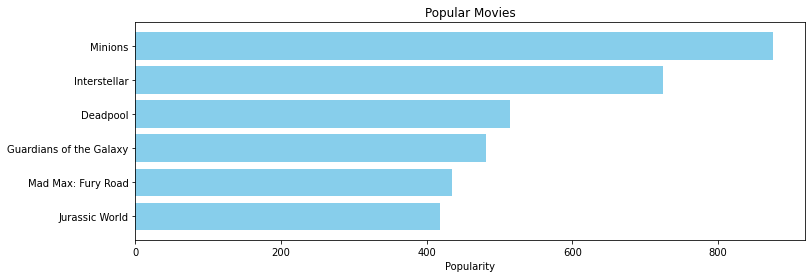

In [13]:
pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

Now something to keep in mind is that these demographic recommender provide a general chart of recommended movies to all the users. They are not sensitive to the interests and tastes of a particular user.
This is when we move on to a more refined system-  Content Basesd Filtering.

이제 기억해야 할 것은 이러한 인구통계학적 추천자가 모든 사용자에게 추천 영화의 일반적인 차트를 제공한다는 것입니다. 그들은 특정 사용자의 흥미와 취향에 민감하지 않습니다. 이것이 우리가 좀 더 정교한 시스템인 Content Basesd Filtering으로 넘어갈 때입니다.

모든 사용자 -> 개별/ 특정 사용자 맞춤 추천 시스템

# **Content Based Filtering**
In this recommender system the content of the movie (overview, cast, crew, keyword, tagline etc) is used to find its similarity with other movies. Then the movies that are most likely to be similar are recommended.

이 추천 시스템에서는 영화의 내용(개요, 캐스팅, 크루, 키워드, 태그라인 등)을 사용하여 다른 영화와의 유사성을 찾습니다. 그러고 나서 가장 비슷할 것 같은 영화를 추천합니다.

![](https://image.ibb.co/f6mDXU/conten.png)

## **Plot description based Recommender**

We will compute pairwise similarity scores for all movies based on their plot descriptions and recommend movies based on that similarity score. The plot description is given in the **overview** feature of our dataset. 
Let's take a look at the data. .. 

## 플롯(줄거리) 설명 기반 추천자

우리는 플롯 설명을 기반으로 모든 영화의 쌍별 유사성 점수를 계산하고 그 유사성 점수를 기반으로 영화를 추천할 것입니다. 플롯 설명은 데이터 세트의 개요(**overview**) 특성에 나와 있습니다. 자료를 살펴봅시다.

In [14]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

For any of you who has done even a  bit of text processing before knows we need to convert the word vector of each overview.
Now we'll compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each overview.

Now if you are wondering what is term frequency , it is the relative frequency of a word in a document and is given as
   **(term instances/total instances)**.
Inverse Document Frequency is the relative count of documents containing the term is given as 
**log(number of documents/documents with term)**
The overall importance of each word to the documents in which they appear is equal to **TF * IDF**

This will give you a matrix where each column represents a word in the overview vocabulary (all the words that appear in at least one document) and each row represents a movie, as before. This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

Fortunately, scikit-learn gives you a built-in TfIdfVectorizer class that produces the TF-IDF matrix in a couple of lines. That's great, isn't it? 


텍스트 처리를 조금이라도 해보신 분들은 각 개요의 단어 벡터를 변환해야 한다는 것을 아실 것입니다. 이제 각 개요에 대해 TF-IDF(Term Frequency-Inverse Document Frequency) 벡터를 계산하겠습니다.

용어 빈도(term frequency)는 문서에 있는 단어의 상대 빈도이며 **(term instances/total instances)**로 지정됩니다. 역 문서 빈도(Inverse Document Frequency)는 **로그(문서 수/용어 포함 문서)** 로 주어진 용어를 포함하는 문서의 상대 개수입니다. 각 단어가 나타나는 문서에서 각 단어의 전체적인 중요도는 **TF * IDF** 와 같습니다.

이렇게 하면 이전과 같이 각 열이 개요 어휘의 단어(하나 이상의 문서에 나타나는 모든 단어)를 나타내고 각 행이 동영상을 나타내는 매트릭스가 제공됩니다.이것은 플롯 개요에서 자주 발생하는 단어의 중요성을 줄이고, 따라서 최종 유사성 점수를 계산하는 데 있어 단어의 중요성을 줄이기 위해 수행됩니다.

다행히도 skit-learn은 TF-IDF 매트릭스를 두 줄로 생성하는 내장 TfIdfVectorizer 클래스를 제공합니다. 잘됐네요, 그렇죠?

In [15]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df2['overview'] = df2['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

We see that over 20,000 different words were used to describe the 4800 movies in our dataset.

With this matrix in hand, we can now compute a similarity score. There are several candidates for this; such as the euclidean, the Pearson and the [cosine similarity scores](https://en.wikipedia.org/wiki/Cosine_similarity). There is no right answer to which score is the best. Different scores work well in different scenarios and it is often a good idea to experiment with different metrics.

We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. We use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate. Mathematically, it is defined as follows:
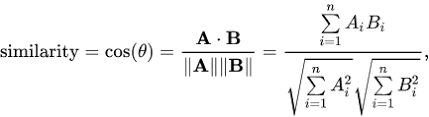

데이터셋에 있는 4800편의 영화를 설명하는 데 20,000개 이상의 단어가 사용되었습니다.

이 행렬을 통해 이제 유사성 점수(similarity scores)를 계산할 수 있습니다. 여기에는 유클리드, 피어슨, 코사인 유사도 점수와 같은 여러 후보가 있습니다. 어느 점수가 가장 좋은지에 대한 정답은 없습니다. 서로 다른 점수는 다른 시나리오에서 잘 작동하며 종종 다른 메트릭스으로 실험하는 것이 좋습니다.

우리는 두 영화 사이의 유사성을 나타내는 숫자 수량을 계산하기 위해 코사인 유사도를 사용할 것입니다. 코사인 유사도 점수는 크기와 무관하고 계산하기가 비교적 쉽고 빠르기 때문에 사용합니다. 수학적으로, 이것은 다음과 같이 정의됩니다.

Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's **linear_kernel()** instead of cosine_similarities() since it is faster.

우리는 TF-IDF vectorizer를 사용해 왔기 때문에 도트곱을 계산하면 코사인 유사도 점수가 바로 나옵니다. 따라서, 우리는 그것이 더 빠르므로 cosine_similarities() 대신 sklearn의 **linear_kernel()**을 사용할 것이다.

In [16]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

We are going to define a function that takes in a movie title as an input and outputs a list of the 10 most similar movies. Firstly, for this, we need a reverse mapping of movie titles and DataFrame indices. In other words, we need a mechanism to identify the index of a movie in our metadata DataFrame, given its title.

우리는 영화 제목을 입력으로 받아와 가장 유사한 영화 10편의 목록을 출력하는 함수를 정의할 것입니다. 먼저 영화 제목과 데이터프레임 인덱스의 역방향 매핑이 필요합니다. 다시 말해, 제목에 따라 메타데이터 데이터프레임에서 영화의 인덱스를 식별할 수 있는 메커니즘이 필요합니다.

In [17]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

We are now in a good position to define our recommendation function. These are the following steps we'll follow :-
* Get the index of the movie given its title.
* Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its position and the second is the similarity score.
* Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.
* Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).
* Return the titles corresponding to the indices of the top elements.


우리는 이제 우리의 추천 function을 정의하기에 좋은 위치에 있습니다. 다음은 우리가 따라야 할 단계입니다.

* 영화 제목에 따라 인덱스를 가져옵니다.
* 특정 영화와 모든 영화의 코사인 유사도 점수 목록을 가져옵니다. 첫 번째 요소가 위치이고 두 번째 요소가 유사성 점수인 튜플 목록으로 변환합니다.
* 앞서 언급한 튜플 목록을 유사성 점수, 즉 두 번째 요소를 기준으로 정렬합니다.
* 이 목록의 상위 10개 요소를 가져옵니다. 자신을 나타내는 첫 번째 요소는 무시합니다(특정 영화와 가장 유사한 영화는 영화 자체입니다).
* 상단 요소의 색인에 해당하는 제목을 반환합니다.

In [18]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]

In [19]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [20]:
get_recommendations('The Avengers')

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title, dtype: object

While our system has done a decent job of finding movies with similar plot descriptions, the quality of recommendations is not that great. "The Dark Knight Rises" returns all Batman movies while it is more likely that the people who liked that movie are more inclined to enjoy other Christopher Nolan movies. This is something that cannot be captured by the present system.

우리 시스템이 줄거리 묘사가 비슷한 영화를 찾는 일은 꽤 해냈지만 추천의 질은 그리 높지 않습니다. "다크나이트 라이즈"는 배트맨 영화를 모두 돌려주는 반면, 그 영화를 좋아했던 사람들은 다른 크리스토퍼 놀런 영화를 더 즐기는 경향이 있다. 이것은 현 시스템으로는 포착할 수 없는 것입니다.

## **Credits, Genres and Keywords Based Recommender**
It goes without saying that the quality of our recommender would be increased with the usage of better metadata. That is exactly what we are going to do in this section. We are going to build a recommender based on the following metadata: the 3 top actors, the director, related genres and the movie plot keywords.

From the cast, crew and keywords features, we need to extract the three most important actors, the director, and the keywords associated with that movie. Right now, our data is present in the form of "stringified" lists , we need to convert it into a safe and usable structure

## 크레딧, 장르 및 키워드 기반 추천자
더 나은 메타데이터를 사용함으로써 우리의 추천자의 품질이 향상될 것이라는 것은 말할 나위도 없습니다. 그것이 바로 우리가 이 섹션에서 할 것입니다. 우리는 3대 톱 배우, 감독, 관련 장르, 영화 줄거리 키워드 등의 메타데이터를 기반으로 추천자를 구축할 예정입니다.

출연진, 제작진, 키워드 특징에서 가장 중요한 세 배우, 감독, 그리고 그 영화와 관련된 키워드를 추출해야 합니다. 현재, 우리의 데이터는 "문자화된" 목록의 형태로 존재하며, 우리는 그것을 안전하고 사용 가능한 구조로 변환해야 합니다.

In [21]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

In [22]:
for feature in features:
    print(df2[feature].head(5))
    print()

0    [{'cast_id': 242, 'character': 'Jake Sully', '...
1    [{'cast_id': 4, 'character': 'Captain Jack Spa...
2    [{'cast_id': 1, 'character': 'James Bond', 'cr...
3    [{'cast_id': 2, 'character': 'Bruce Wayne / Ba...
4    [{'cast_id': 5, 'character': 'John Carter', 'c...
Name: cast, dtype: object

0    [{'credit_id': '52fe48009251416c750aca23', 'de...
1    [{'credit_id': '52fe4232c3a36847f800b579', 'de...
2    [{'credit_id': '54805967c3a36829b5002c41', 'de...
3    [{'credit_id': '52fe4781c3a36847f81398c3', 'de...
4    [{'credit_id': '52fe479ac3a36847f813eaa3', 'de...
Name: crew, dtype: object

0    [{'id': 1463, 'name': 'culture clash'}, {'id':...
1    [{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...
2    [{'id': 470, 'name': 'spy'}, {'id': 818, 'name...
3    [{'id': 849, 'name': 'dc comics'}, {'id': 853,...
4    [{'id': 818, 'name': 'based on novel'}, {'id':...
Name: keywords, dtype: object

0    [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
1    [{'id': 12, 'name': 'Adventure

Next, we'll write functions that will help us to extract the required information from each feature.

다음으로 각 특성에서 필요한 정보를 추출할 수 있는 function을 작성하겠습니다.

In [23]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [24]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

# https://www.w3schools.com/python/ref_func_isinstance.asp

In [25]:
# Define new director, cast, genres and keywords features that are in a suitable form.
# 새로운 감독, 출연진, 장르, 키워드 특성을 적절한 형태로 정의
df2['director'] = df2['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [26]:
df2['director'].head(5)

0        James Cameron
1       Gore Verbinski
2           Sam Mendes
3    Christopher Nolan
4       Andrew Stanton
Name: director, dtype: object

In [27]:
for feature in features:
    print(df2[feature].head(5))
    print()

0    [Sam Worthington, Zoe Saldana, Sigourney Weaver]
1       [Johnny Depp, Orlando Bloom, Keira Knightley]
2        [Daniel Craig, Christoph Waltz, Léa Seydoux]
3        [Christian Bale, Michael Caine, Gary Oldman]
4      [Taylor Kitsch, Lynn Collins, Samantha Morton]
Name: cast, dtype: object

0       [culture clash, future, space war]
1       [ocean, drug abuse, exotic island]
2      [spy, based on novel, secret agent]
3    [dc comics, crime fighter, terrorist]
4        [based on novel, mars, medallion]
Name: keywords, dtype: object

0            [Action, Adventure, Fantasy]
1            [Adventure, Fantasy, Action]
2              [Action, Adventure, Crime]
3                  [Action, Crime, Drama]
4    [Action, Adventure, Science Fiction]
Name: genres, dtype: object



In [28]:
# Print the new features of the first 3 films
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


The next step would be to convert the names and keyword instances into lowercase and strip all the spaces between them. This is done so that our vectorizer doesn't count the Johnny of "Johnny Depp" and "Johnny Galecki" as the same.

다음 단계는 이름과 키워드 인스턴스를 소문자로 변환하고 그 사이의 공백을 모두 지우는 것입니다. 이것은 우리의 벡터라이저가 "조니 뎁"과 "조니 갈레키"의 조니를 같은 것으로 계산하지 않기 위해 행해진 것입니다.

In [29]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

### <span style="color:green">24-30 주영</span>

In [30]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)
    
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html

In [31]:
for feature in features:
    print(df2[feature].head(5))
    print()

0    [samworthington, zoesaldana, sigourneyweaver]
1       [johnnydepp, orlandobloom, keiraknightley]
2        [danielcraig, christophwaltz, léaseydoux]
3        [christianbale, michaelcaine, garyoldman]
4      [taylorkitsch, lynncollins, samanthamorton]
Name: cast, dtype: object

0       [cultureclash, future, spacewar]
1       [ocean, drugabuse, exoticisland]
2       [spy, basedonnovel, secretagent]
3    [dccomics, crimefighter, terrorist]
4        [basedonnovel, mars, medallion]
Name: keywords, dtype: object

0        jamescameron
1       goreverbinski
2           sammendes
3    christophernolan
4       andrewstanton
Name: director, dtype: object

0           [action, adventure, fantasy]
1           [adventure, fantasy, action]
2             [action, adventure, crime]
3                 [action, crime, drama]
4    [action, adventure, sciencefiction]
Name: genres, dtype: object



We are now in a position to create our "metadata soup", which is a string that contains all the metadata that we want to feed to our vectorizer (namely actors, director and keywords).

이제 우리의 vectorizer(액터, 감독 및 키워드)에 제공할 모든 메타데이터가 포함된 문자열인 "메타데이터 수프(soup)"를 생성할 수 있습니다.

### pandas.DataFrame.join

DataFrame.join(other, on=None, how='left', lsuffix='', rsuffix='', sort=False)

- Join columns with other DataFrame either on index or on a key column. Efficiently join multiple DataFrame objects by index at once by passing a list.
- 인덱스 또는 키 열에 다른 DataFrame과 열을 결합합니다. 목록을 전달하여 인덱스별로 여러 DataFrame 개체를 효율적으로 결합할 수 있습니다.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html

In [32]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])

df2['soup'] = df2.apply(create_soup, axis=1)

In [33]:
df2['soup'].head(5)

0    cultureclash future spacewar samworthington zo...
1    ocean drugabuse exoticisland johnnydepp orland...
2    spy basedonnovel secretagent danielcraig chris...
3    dccomics crimefighter terrorist christianbale ...
4    basedonnovel mars medallion taylorkitsch lynnc...
Name: soup, dtype: object

The next steps are the same as what we did with our plot description based recommender. One important difference is that we use the **CountVectorizer()** instead of TF-IDF. This is because we do not want to down-weight the presence of an actor/director if he or she has acted or directed in relatively more movies. It doesn't make much intuitive sense.

다음 단계는 플롯 설명 기반 추천자로 수행한 것과 동일합니다. 한 가지 중요한 차이점은 TF-IDF 대신 **CountVectorizer()**를 사용한다는 것입니다. 상대적으로 더 많은 영화에서 배우/감독이 연기하거나 연출을 했다면 그 존재감을 과소평가하고 싶지 않기 때문입니다. 그것은 그다지 직관적이지는 않습니다.

TF-IDF(Term Frequency - Inverse Document Frequency)

 - 단어의 빈도만을 계산하면, 자주 사용되는 단어들의 중요도가 올라가는 단점을 개선한 방식

 - 모든 문서에서 전반적으로 자주 등장하는 단어에 대해서는 패널티를 주고, 해당 문서에서만 자주 등장하는 단어에 높은 가중치를 주는 방식

https://blog.naver.com/whdals0/222305035003

https://bkshin.tistory.com/entry/NLP-6-%EC%B9%B4%EC%9A%B4%ED%84%B0-%EA%B8%B0%EB%B0%98-%EB%B2%A1%ED%84%B0%ED%99%94CountVectorizer%EC%99%80-TF-IDF-%EB%B2%A1%ED%84%B0%ED%99%94

### sklearn.feature_extraction.text.CountVectorizer

class sklearn.feature_extraction.text.CountVectorizer(*, input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern='(?u)\b\w\w+\b', ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.int64'>)

- Convert a collection of text documents to a matrix of token counts.

- This implementation produces a sparse representation of the counts using scipy.sparse.csr_matrix.

- If you do not provide an a-priori dictionary and you do not use an analyzer that does some kind of feature selection then the number of features will be equal to the vocabulary size found by analyzing the data.


- 텍스트 문서 모음을 토큰 개수 행렬로 변환합니다.

- 이 구현은 scipy.sparse.csr_matrix를 사용하여 카운트를 희소하게 표현합니다.

- 사전에 dictionary를 제공하지 않고 피쳐를 선택하는 분석기를 사용하지 않는 경우 피쳐 수는 데이터를 분석하여 찾은 어휘 크기와 같습니다.

- 각 문서에서 해당 단어가 나타나는 횟수를 Count 하여 feature로 사용


    - stop_words{‘english’}, list, default=None
            - If ‘english’, a built-in stop word list for English is used. There are several known issues with ‘english’ and you should consider an alternative (see Using stop words).

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [34]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

# fit_transform(raw_documents[, y])
# Learn the vocabulary dictionary and return document-term matrix.
# vocabulary dictionary을 학습하고 document-term matrix를 반환

In [35]:
count_matrix

<4803x11520 sparse matrix of type '<class 'numpy.int64'>'
	with 42935 stored elements in Compressed Sparse Row format>

### sklearn.metrics.pairwise.cosine_similarity

sklearn.metrics.pairwise.cosine_similarity(X, Y=None, dense_output=True)

- Compute cosine similarity between samples in X and Y.
- Cosine similarity, or the cosine kernel, computes similarity as the normalized dot product of X and Y:
- K(X, Y) = <X, Y> / (||X||*||Y||)
- On L2-normalized data, this function is equivalent to linear_kernel.


- X와 Y의 표본 사이의 코사인 유사도를 계산합니다.
- 코사인 유사성 또는 코사인 커널은 X와 Y의 정규화된 도트 곱과 유사성을 계산한다.
- K(X, Y) = <X, Y> / (|X||*|)Y||)
- L2 정규화 데이터에서 이 함수는 선형_커널과 동일합니다.

In [36]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

TF-IDF vectorizer를 사용하지 않았으므로 linear_kernel()을 사용할 수 x
CountVectorizer를 사용했으므로 cosine_similarity() 사용

In [37]:
cosine_sim2

array([[1. , 0.3, 0.2, ..., 0. , 0. , 0. ],
       [0.3, 1. , 0.2, ..., 0. , 0. , 0. ],
       [0.2, 0.2, 1. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 1. ]])

In [38]:
# Reset index of our main DataFrame and construct reverse mapping as before
# 이전과 같이 메인 DataFrame의 인덱스를 리셋하고 역방향 매핑을 구성합니다.
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

In [39]:
df2.head(5)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,status,tagline,title,vote_average,vote_count,tittle,cast,crew,director,soup
0,0,237000000,"[action, adventure, fantasy]",http://www.avatarmovie.com/,19995,"[cultureclash, future, spacewar]",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[samworthington, zoesaldana, sigourneyweaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...",jamescameron,cultureclash future spacewar samworthington zo...
1,1,300000000,"[adventure, fantasy, action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drugabuse, exoticisland]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",goreverbinski,ocean drugabuse exoticisland johnnydepp orland...
2,2,245000000,"[action, adventure, crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, basedonnovel, secretagent]",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[danielcraig, christophwaltz, léaseydoux]","[{'credit_id': '54805967c3a36829b5002c41', 'de...",sammendes,spy basedonnovel secretagent danielcraig chris...
3,3,250000000,"[action, crime, drama]",http://www.thedarkknightrises.com/,49026,"[dccomics, crimefighter, terrorist]",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[christianbale, michaelcaine, garyoldman]","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",christophernolan,dccomics crimefighter terrorist christianbale ...
4,4,260000000,"[action, adventure, sciencefiction]",http://movies.disney.com/john-carter,49529,"[basedonnovel, mars, medallion]",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[taylorkitsch, lynncollins, samanthamorton]","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",andrewstanton,basedonnovel mars medallion taylorkitsch lynnc...


In [40]:
indices.head(5)

title
Avatar                                      0
Pirates of the Caribbean: At World's End    1
Spectre                                     2
The Dark Knight Rises                       3
John Carter                                 4
dtype: int64

We can now reuse our **get_recommendations()** function by passing in the new **cosine_sim2** matrix as your second argument.

우리는 이제 새로운 cosine_sim2 행렬을 두 번째 인수로 전달함으로써 get_recommendations() 함수를 재사용할 수 있습니다.

In [41]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title, dtype: object

In [42]:
get_recommendations('The Godfather', cosine_sim2)

867      The Godfather: Part III
2731      The Godfather: Part II
4638    Amidst the Devil's Wings
2649           The Son of No One
1525              Apocalypse Now
1018             The Cotton Club
1170     The Talented Mr. Ripley
1209               The Rainmaker
1394               Donnie Brasco
1850                    Scarface
Name: title, dtype: object

We see that our recommender has been successful in capturing more information due to more metadata and has given us (arguably) better recommendations. It is more likely that Marvels or DC comics fans will like the movies of the same production house. Therefore, to our features above we can add *production_company* . 
We can also increase the weight of the director , by adding the feature multiple times in the soup.

우리의 추천자가 더 많은 메타데이터로 인해 더 많은 정보를 성공적으로 캡처했으며 더 나은 추천 사항을 제공했음을 알 수 있습니다. 마블이나 DC 만화 팬들은 같은 제작사의 영화를 좋아할 가능성이 더 높습니다. 따라서 위의 기능에 *production_company*를 추가할 수 있습니다. 우리는 또한 수프에 여러 가지 기능을 추가하여 감독의 무게를 늘릴 수 있습니다.

**한계**

- 특정 영화에 가까운 영화만 제안할 수 있으므로 장르를 넘나들며 취향을 포착하고 추천을 해줄 능력이 없음

- 사용자의 개인적 취향과 편견을 포착하지 못한다는 점에서 개별 사용자 맞춤 시스템이 아님

# **Collaborative Filtering**

Our content based engine suffers from some severe limitations. It is only capable of suggesting movies which are close to a certain movie. That is, it is not capable of capturing tastes and providing recommendations across genres.

Also, the engine that we built is not really personal in that it doesn't capture the personal tastes and biases of a user. Anyone querying our engine for recommendations based on a movie will receive the same recommendations for that movie, regardless of who she/he is.

Therefore, in this section, we will use a technique called Collaborative Filtering to make recommendations to Movie Watchers.
It is basically of two types:-

*  **User based filtering**-  These systems recommend products to a user that similar users have liked. For measuring the similarity between two users we can either use pearson correlation or cosine similarity.
This filtering technique can be illustrated with an example. In the following matrixes, each row represents a user, while the columns correspond to different movies except the last one which records the similarity between that user and the target user. Each cell represents the rating that the user gives to that movie. Assume user E is the target.
![](https://cdn-images-1.medium.com/max/1000/1*9NBFo4AUQABKfoUOpE3F8Q.png)

Since user A and F do not share any movie ratings in common with user E, their similarities with user E are not defined in Pearson Correlation. Therefore, we only need to consider user B, C, and D. Based on Pearson Correlation, we can compute the following similarity.
![](https://cdn-images-1.medium.com/max/1000/1*jZIMJzKM1hKTFftHfcSxRw.png)

From the above table we can see that user D is very different from user E as the Pearson Correlation between them is negative. He rated Me Before You higher than his rating average, while user E did the opposite. Now, we can start to fill in the blank for the movies that user E has not rated based on other users.
![](https://cdn-images-1.medium.com/max/1000/1*9TC6BrfxYttJwiATFAIFBg.png)

Although computing user-based CF is very simple, it suffers from several problems. One main issue is that users’ preference can change over time. It indicates that precomputing the matrix based on their neighboring users may lead to bad performance. To tackle this problem, we can apply item-based CF.

* **Item Based Collaborative Filtering** - Instead of measuring the similarity between users, the item-based CF recommends items based on their similarity with the items that the target user rated. Likewise, the similarity can be computed with Pearson Correlation or Cosine Similarity. The major difference is that, with item-based collaborative filtering, we fill in the blank vertically, as oppose to the horizontal manner that user-based CF does. The following table shows how to do so for the movie Me Before You.
![](https://cdn-images-1.medium.com/max/1000/1*LqFnWb-cm92HoMYBL840Ew.png)

It successfully avoids the problem posed by dynamic user preference as item-based CF is more static. However, several problems remain for this method. First, the main issue is ***scalability***. The computation grows with both the customer and the product. The worst case complexity is O(mn) with m users and n items. In addition, ***sparsity*** is another concern. Take a look at the above table again. Although there is only one user that rated both Matrix and Titanic rated, the similarity between them is 1. In extreme cases, we can have millions of users and the similarity between two fairly different movies could be very high simply because they have similar rank for the only user who ranked them both.



### **Single Value Decomposition**
One way to handle the scalability and sparsity issue created by CF is to leverage a **latent factor model** to capture the similarity between users and items. Essentially, we want to turn the recommendation problem into an optimization problem. We can view it as how good we are in predicting the rating for items given a user. One common metric is Root Mean Square Error (RMSE). **The lower the RMSE, the better the performance**.

Now talking about latent factor you might be wondering what is it ?It is a broad idea which describes a property or concept that a user or an item have. For instance, for music, latent factor can refer to the genre that the music belongs to. SVD decreases the dimension of the utility matrix by extracting its latent factors. Essentially, we map each user and each item into a latent space with dimension r. Therefore, it helps us better understand the relationship between users and items as they become directly comparable. The below figure illustrates this idea.

![](https://cdn-images-1.medium.com/max/800/1*GUw90kG2ltTd2k_iv3Vo0Q.png)

https://angeloyeo.github.io/2019/08/01/SVD.html

Now enough said , let's see how to implement this.
Since the dataset we used before did not have userId(which is necessary for collaborative filtering) let's load another dataset. We'll be using the [**Surprise** ](https://surprise.readthedocs.io/en/stable/index.html) library to implement SVD.

In [43]:
#pip install scikit-surprise

#from surprise import Reader, Dataset, SVD, evaluate
#evaluate module - deprecated since version 1.05. Use cross_validate instead. This function will be removed in later versions.
#https://surprise.readthedocs.io/en/v1.0.5/evaluate.html
#https://surprise.readthedocs.io/en/v1.0.5/model_selection.html#surprise.model_selection.validation.cross_validate

from surprise import Reader, Dataset, SVD, model_selection
reader = Reader()
ratings = pd.read_csv('../input/the-movies-dataset/ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


Note that in this dataset movies are rated on a scale of 5 unlike the earlier one.

In [44]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
# data.split(n_folds=5)
# split and evaluate functions are removed by surprise.

In [45]:
svd = SVD()
#evaluate(svd, data, measures=['RMSE', 'MAE'])
model_selection.validation.cross_validate(svd, data, measures=['RMSE', 'MAE'])

{'test_rmse': array([0.89946089, 0.90088306, 0.89376263, 0.89752982, 0.88899639]),
 'test_mae': array([0.6929283 , 0.69456027, 0.68798808, 0.69020481, 0.68512717]),
 'fit_time': (8.026076316833496,
  7.5620808601379395,
  7.554165840148926,
  6.84301233291626,
  6.012502431869507),
 'test_time': (0.1951429843902588,
  0.3064279556274414,
  0.18851017951965332,
  0.2284560203552246,
  0.18329715728759766)}

We get a mean Root Mean Sqaure Error of 0.89 approx which is more than good enough for our case. Let us now train on our dataset and arrive at predictions.

In [46]:
trainset = data.build_full_trainset()
svd.fit(trainset)

Let us pick user with user Id 1  and check the ratings she/he has given.

In [47]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [48]:
svd.predict(1, 302, 3)

Prediction(uid=1, iid=302, r_ui=3, est=2.7848577997414266, details={'was_impossible': False})

For movie with ID 302, we get an estimated prediction of **2.618**. One startling feature of this recommender system is that it doesn't care what the movie is (or what it contains). It works purely on the basis of an assigned movie ID and tries to predict ratings based on how the other users have predicted the movie.

## **Conclusion** 
We create recommenders using demographic , content- based and collaborative filtering. While demographic filtering is very elemantary and cannot be used practically, **Hybrid Systems** can take advantage of content-based and collaborative filtering as the two approaches are proved to be almost complimentary.
This model was very baseline and only provides a fundamental framework to start with.

I would like to mention some excellent refereces that I learned from
1. [https://hackernoon.com/introduction-to-recommender-system-part-1-collaborative-filtering-singular-value-decomposition-44c9659c5e75](https://hackernoon.com/introduction-to-recommender-system-part-1-collaborative-filtering-singular-value-decomposition-44c9659c5e75)
2. [https://www.kaggle.com/rounakbanik/movie-recommender-systems](https://www.kaggle.com/rounakbanik/movie-recommender-systems)
3. [http://trouvus.com/wp-content/uploads/2016/03/A-hybrid-movie-recommender-system-based-on-neural-networks.pdf](http://trouvus.com/wp-content/uploads/2016/03/A-hybrid-movie-recommender-system-based-on-neural-networks.pdf)

If you enjoyed reading the kernel , hit the upvote button !
Please leave the feedback or suggestions below. 